In [1]:
import pandas as pd 
data = pd.read_csv(
    'AmesHousing.txt', 
    sep='\t', 
    keep_default_na=False, 
    na_values=[''])

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 

### Data Understanding

In [2]:
# Checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
data.shape

(2930, 82)

In [4]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
# A variable named "missing_values" is created to aggregately sum up all missing values of every variable
missing_values = data.isna().sum()

""" The variable is then replaced with only showing variables which have missing values 
(not including variables with zero missing values """
missing_values = missing_values[missing_values != 0].sort_values(ascending = False)

# Show the result
missing_values

Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Exposure       4
Bsmt Full Bath      2
Garage Finish       2
BsmtFin Type 2      2
Bsmt Half Bath      2
Garage Qual         1
Garage Area         1
Garage Cars         1
Bsmt Unf SF         1
Electrical          1
Total Bsmt SF       1
BsmtFin SF 2        1
BsmtFin SF 1        1
BsmtFin Type 1      1
Bsmt Cond           1
Bsmt Qual           1
Garage Cond         1
dtype: int64

In [6]:
# This is to drop the column Order and rows mean and std, transpose the dataframe and round it to the nearest integer
data.describe().drop("Order",axis=1).drop("count",axis=0).drop("mean",axis=0).drop("std",axis=0).transpose().round(0).astype(int)

,min,25%,50%,75%,max
PID,526301100,528477022,535453620,907181098,1007100110
MS SubClass,20,20,50,70,190
Lot Frontage,21,58,68,80,313
Lot Area,1300,7440,9436,11555,215245
Overall Qual,1,5,6,7,10
Overall Cond,1,5,5,6,9
Year Built,1872,1954,1973,2001,2010
Year Remod/Add,1950,1965,1993,2004,2010
Mas Vnr Area,0,0,0,164,1600
BsmtFin SF 1,0,0,370,734,5644


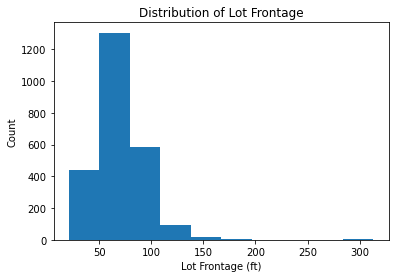

In [7]:
import matplotlib.pyplot as plt
plt.hist(data['Lot Frontage'])

plt.xlabel('Lot Frontage (ft)')
plt.ylabel('Count')
plt.title('Distribution of Lot Frontage')

plt.savefig('plot')

### Data Cleaning

In [8]:
data["Lot Frontage"] = data["Lot Frontage"].fillna(data["Lot Frontage"].median())

In [9]:
data["Garage Finish"].value_counts()

Unf    1231
RFn     812
Fin     728
NA      157
Name: Garage Finish, dtype: int64

In [10]:
grg_cat_cols = ['Garage Cars', 'Garage Finish', 'Garage Qual', 'Garage Area', 'Garage Cond']
data[grg_cat_cols] = data[grg_cat_cols].fillna('None')

In [11]:
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(0)

In [12]:
data[["Mas Vnr Area"]] = data[["Mas Vnr Area"]].fillna(0)
data[["Mas Vnr Type"]] = data[["Mas Vnr Type"]].fillna("None")

In [13]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
data[bsmt_num_cols] = data[bsmt_num_cols].fillna(0)

bsmt_cat_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
data[bsmt_cat_cols] = data[bsmt_cat_cols].fillna('None')

In [14]:
data["Electrical"] = data["Electrical"].fillna(data["Electrical"].mode())

In [15]:
# Dropping those variables with lots of undetected missing values
data.drop(['Alley', 'Pool QC', 'Misc Feature'], axis=1, inplace=True)

/Users/devlingavriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


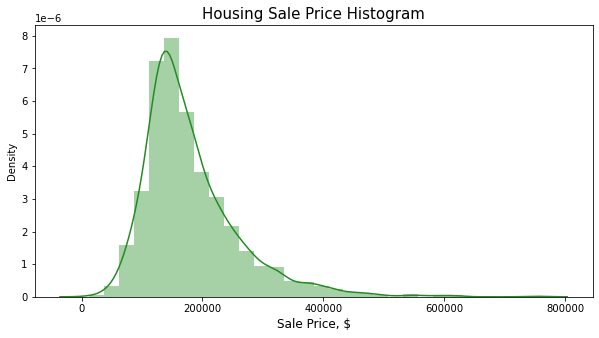

In [16]:
# The right-skew to the SalePrice is obvious in the histogram, showing that SalePrice has a long right tail
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data.SalePrice, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price, $', fontsize=12);

In [17]:
# One of the chief factors affecting house prices in the size of the property.
# Here we examine the basement square footage variables. 
data[['BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF', 'Bsmt Unf SF']].head()

,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,Bsmt Unf SF
0,639.0,0.0,1080.0,441.0
1,468.0,144.0,882.0,270.0
2,923.0,0.0,1329.0,406.0
3,1065.0,0.0,2110.0,1045.0
4,791.0,0.0,928.0,137.0


In [18]:
# There are 45 instances of 'SalePrice' being 3 std above the mean
data["SalePrice"][(data["SalePrice"] > np.mean(data["SalePrice"]) + 3*np.std(data["SalePrice"]))].count()

45

In [19]:
# But there are zero cases of the opposite
data["SalePrice"][(data["SalePrice"] < np.mean(data["SalePrice"]) - 3*np.std(data["SalePrice"]))].count()

0

In [20]:
data = data[(data["SalePrice"] < np.mean(data["SalePrice"]) + 3*np.std(data["SalePrice"]))]

In [21]:
data.shape

(2885, 79)

## Correlation

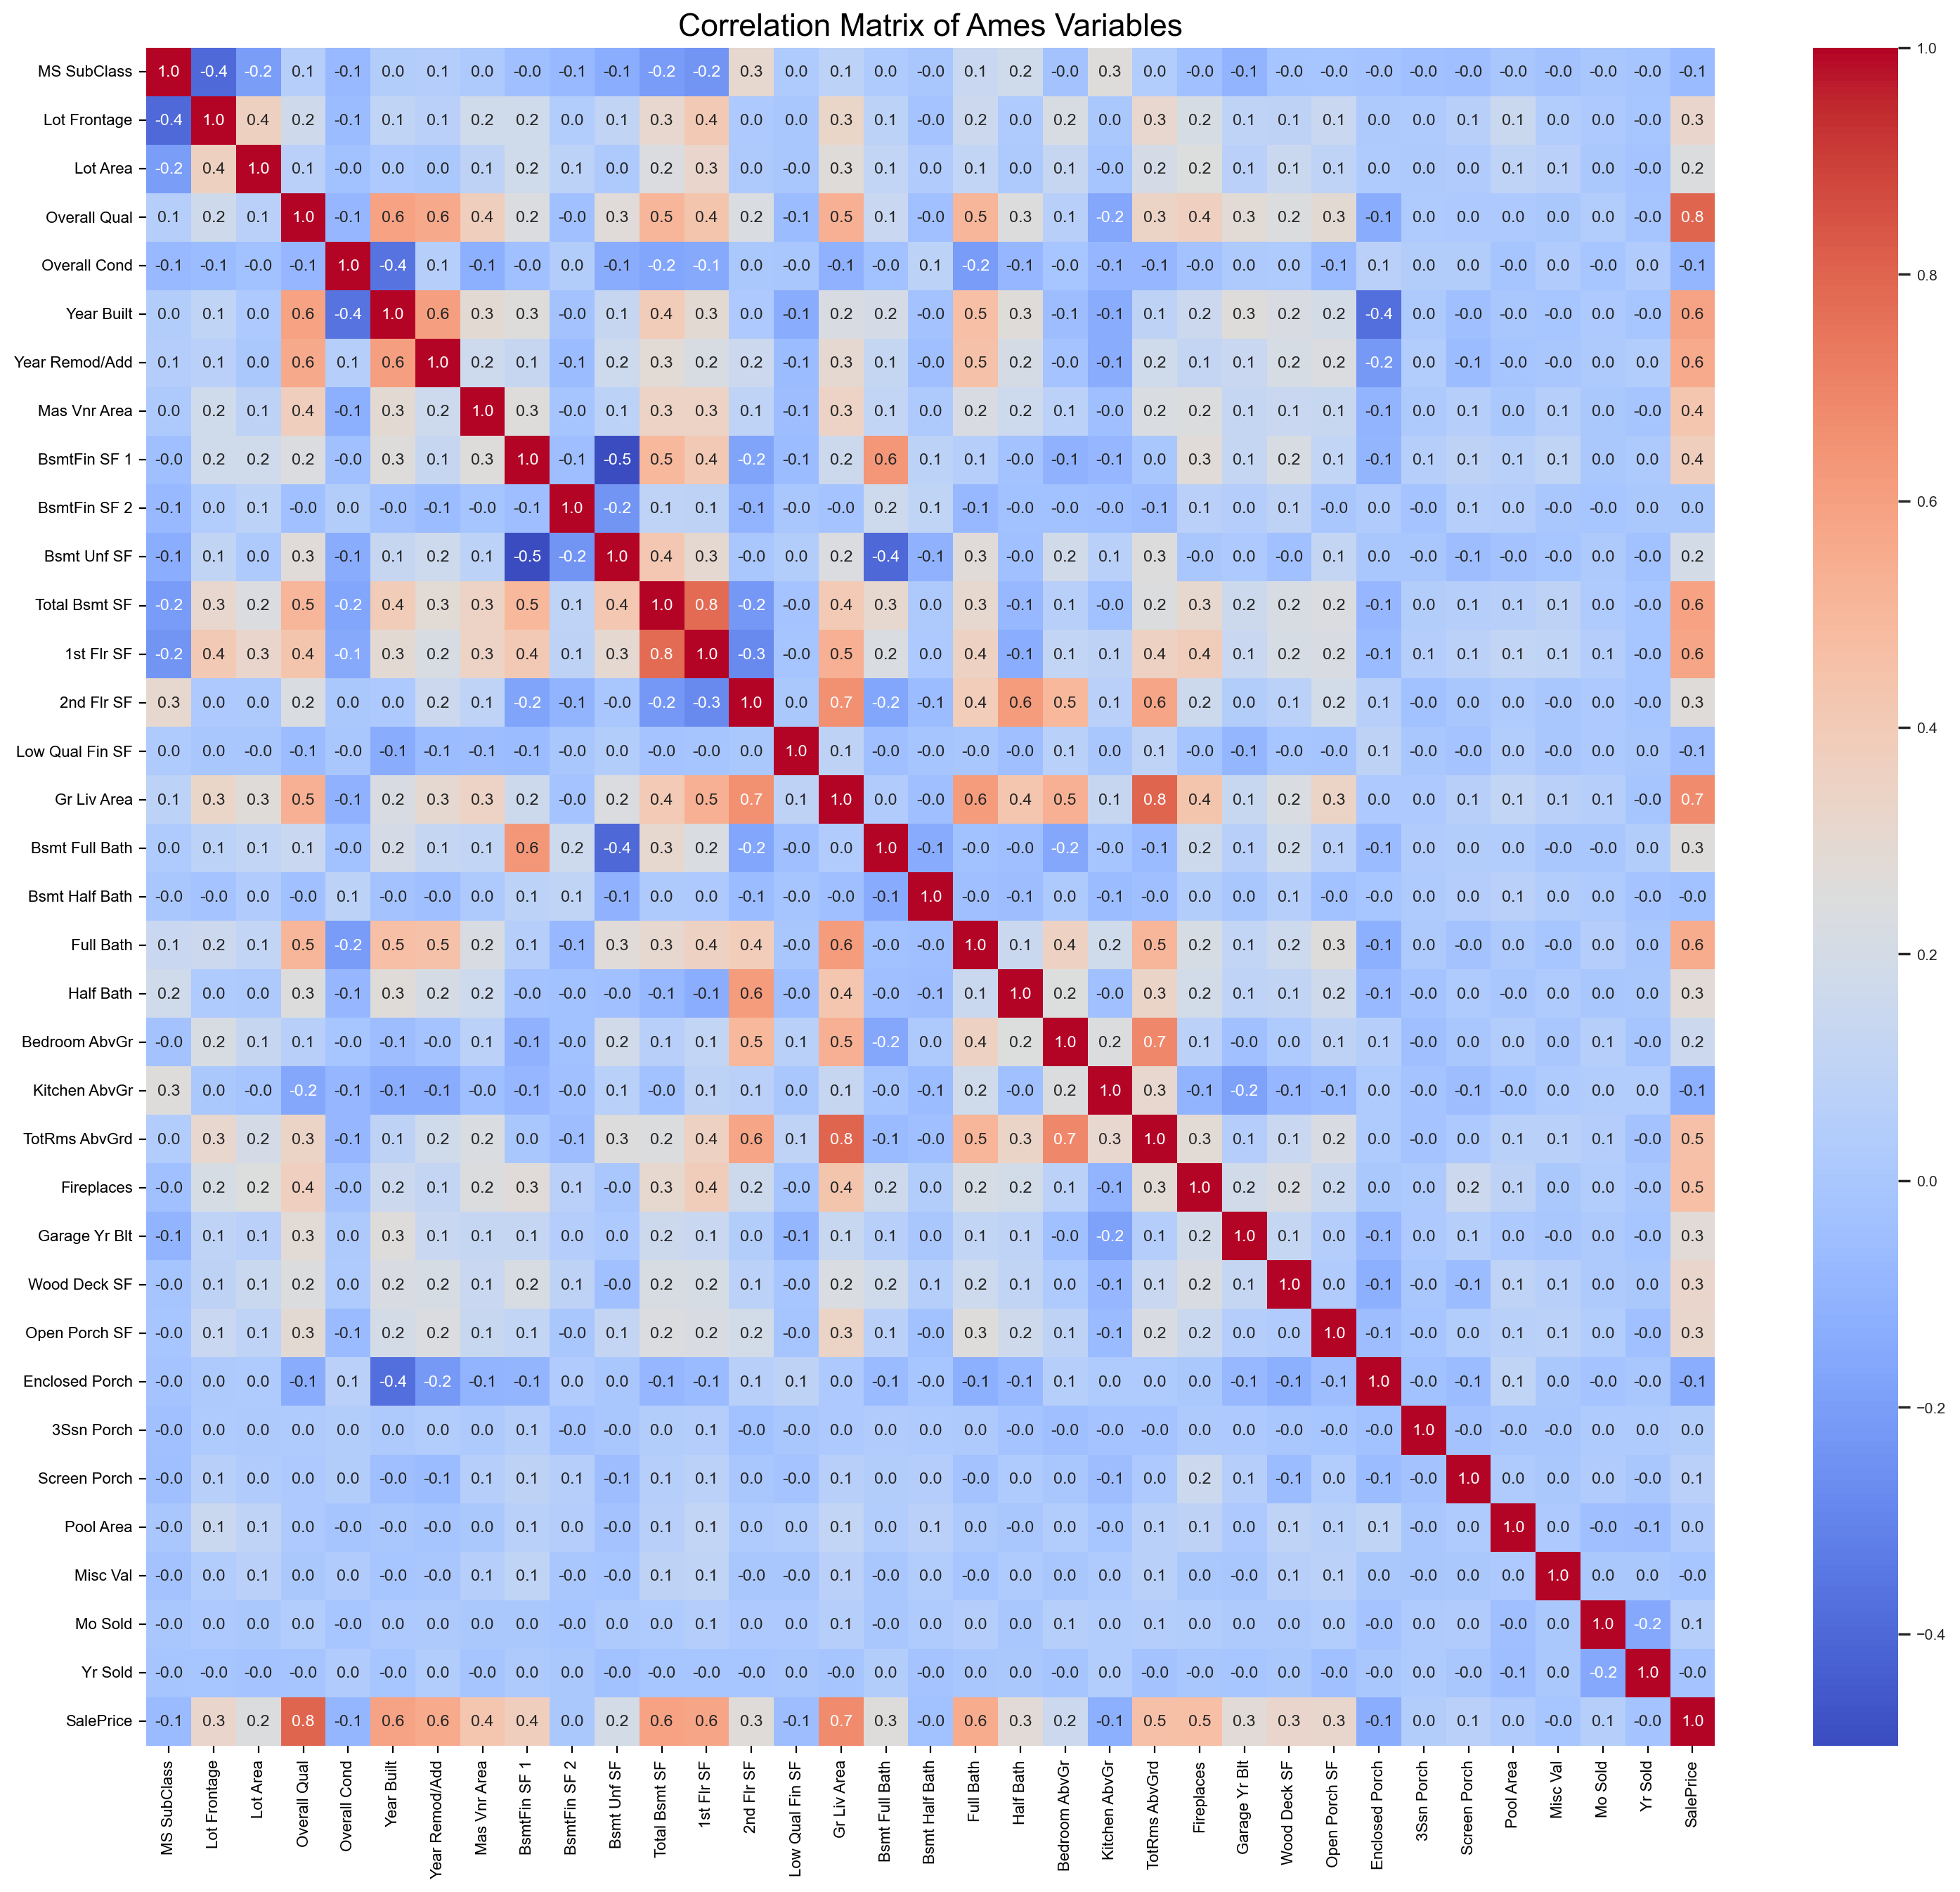

In [22]:
fig, ax = plt.subplots(figsize=(18, 16), dpi = 200)

sns.set(font_scale=0.7)
sns.heatmap(data.drop(["Order", "PID"],axis=1).corr(), annot=True, fmt=".1f", cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of Ames Variables", fontsize=16)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)
plt.show()

In [23]:
# Create a new variable to include the correlation between all variables but Order
corr_SalePrice = data.drop("Order",axis=1).corr().round(2)

# Print out the correlation of only Sale Price with all other numerical variables (but Order) in a descending order
# (by correlation coefficient)
print(corr_SalePrice["SalePrice"].sort_values(ascending=False))

SalePrice          1.00
Overall Qual       0.80
Gr Liv Area        0.68
Total Bsmt SF      0.60
Year Built         0.59
1st Flr SF         0.58
Year Remod/Add     0.56
Full Bath          0.55
Fireplaces         0.47
TotRms AbvGrd      0.46
Mas Vnr Area       0.43
BsmtFin SF 1       0.38
Open Porch SF      0.32
Lot Frontage       0.32
Wood Deck SF       0.32
Garage Yr Blt      0.28
Half Bath          0.28
2nd Flr SF         0.26
Bsmt Full Bath     0.26
Lot Area           0.24
Bsmt Unf SF        0.19
Bedroom AbvGr      0.15
Screen Porch       0.07
Mo Sold            0.05
3Ssn Porch         0.05
Pool Area          0.03
BsmtFin SF 2       0.01
Misc Val          -0.01
Yr Sold           -0.02
Bsmt Half Bath    -0.04
Low Qual Fin SF   -0.06
MS SubClass       -0.07
Overall Cond      -0.09
Enclosed Porch    -0.13
Kitchen AbvGr     -0.13
PID               -0.23
Name: SalePrice, dtype: float64


In [24]:
data["Neighborhood"].nunique()

28

### Model 1

#### Depicting the correlation coefficients

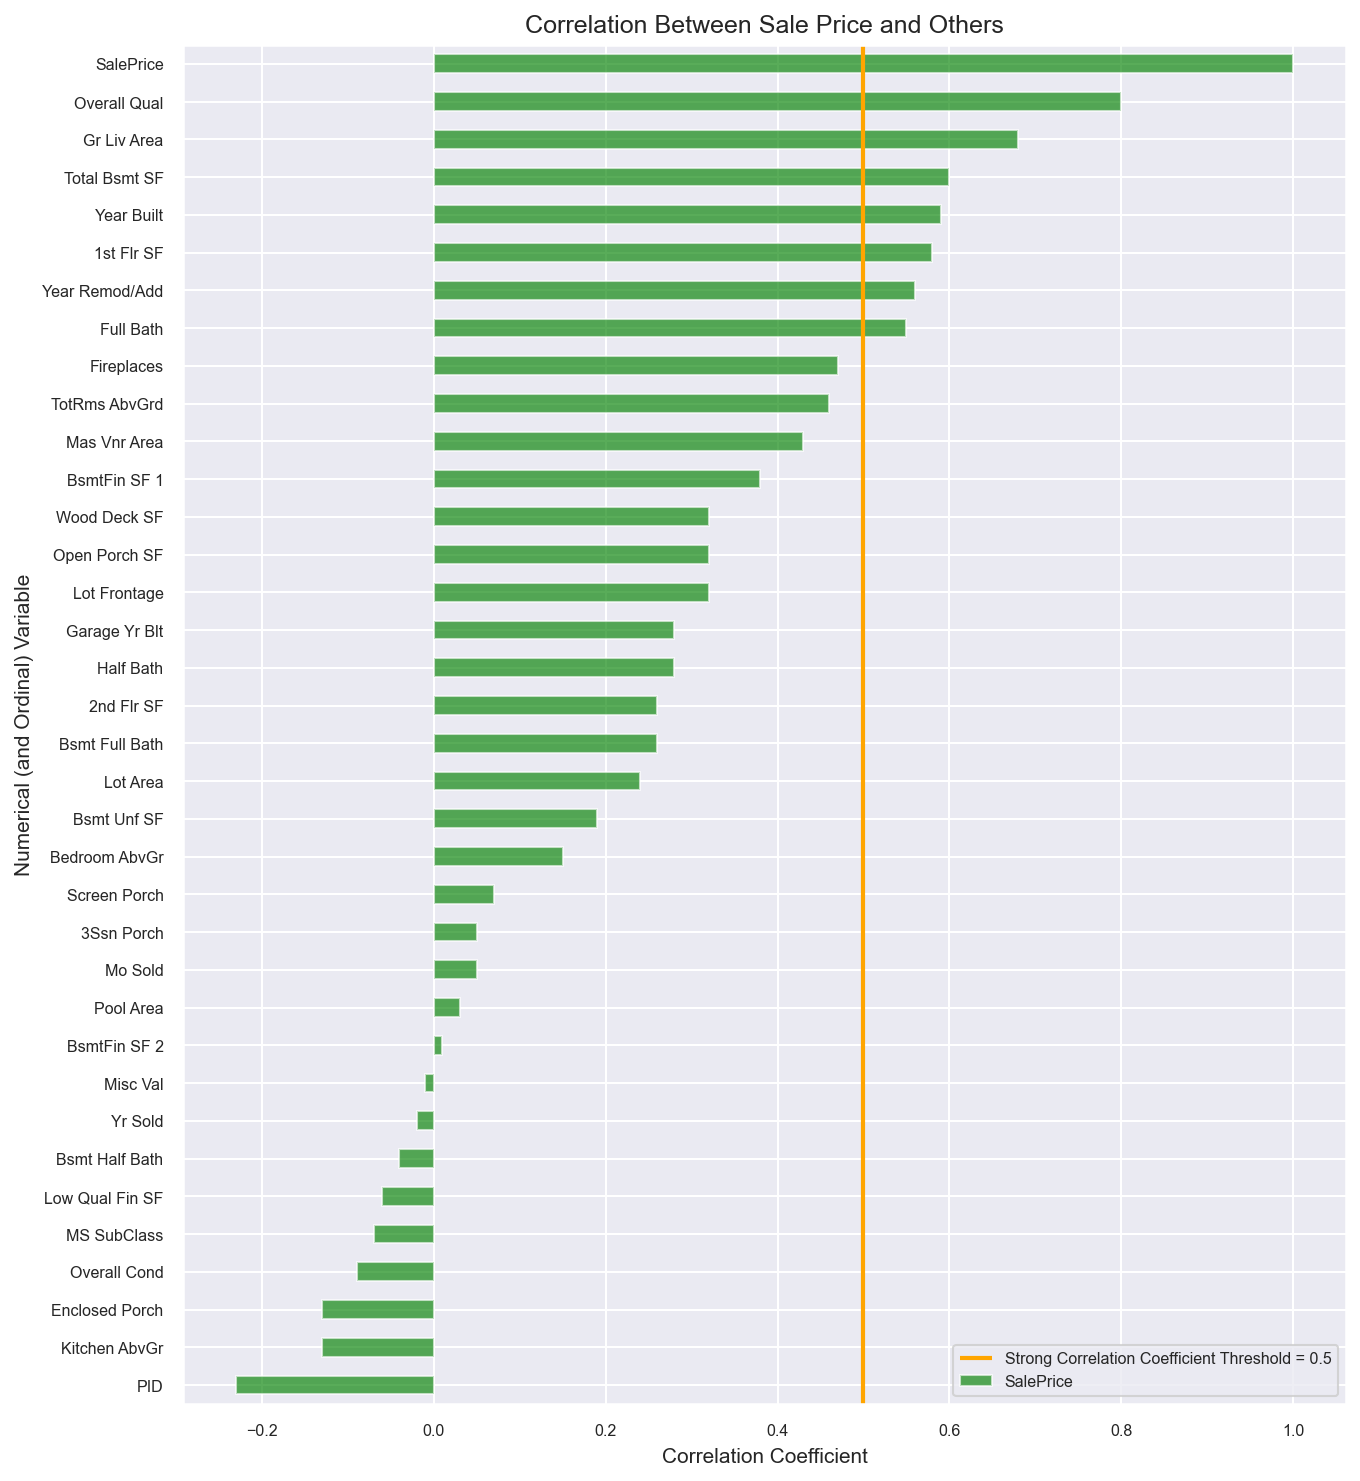

In [25]:
# Configure the plot
plt.figure(figsize = (10,12),dpi=150)

# Plot a bar graph of the correlation between Sale Price and other numerical variables (but Order) in a descending order
ax = corr_SalePrice["SalePrice"].sort_values(ascending=True).plot(kind="barh", figsize = (10, 12), color = "green", alpha = 0.65)
ax.vlines(0.5, -2, 40, lw = 2, color = "orange", label = "Strong Correlation Coefficient Threshold = 0.5")

# Set the plot
plt.xlabel("Correlation Coefficient", size = 10)
plt.ylabel("Numerical (and Ordinal) Variable", size = 10)
plt.title("Correlation Between Sale Price and Others", size = 12)
plt.legend()
 
# rendering plot
plt.show()

In [26]:
m1 = data[["SalePrice","Overall Qual", "Gr Liv Area","Total Bsmt SF", "Year Built", "1st Flr SF", "Year Remod/Add", "Full Bath", "Neighborhood"]]

In [27]:
# Get the dummy vars
one_hot = pd.get_dummies(m1['Neighborhood'])
# Drop column as it is now encoded
m1 = m1.drop('Neighborhood',axis = 1)
# Join the encoded df
m1 = m1.join(one_hot)
m1

,SalePrice,Overall Qual,Gr Liv Area,Total Bsmt SF,Year Built,1st Flr SF,Year Remod/Add,Full Bath,Blmngtn,Blueste,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,215000,6,1656,1080.0,1960,1656,1960,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,105000,5,896,882.0,1961,896,1961,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,172000,6,1329,1329.0,1958,1329,1958,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244000,7,2110,2110.0,1968,2110,1968,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,189900,5,1629,928.0,1997,928,1998,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,1003.0,1984,1003,1984,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,131000,5,902,864.0,1983,902,1983,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2927,132000,5,970,912.0,1992,970,1992,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,170000,5,1389,1389.0,1974,1389,1975,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
m1.columns.get_loc("Veenker")

35

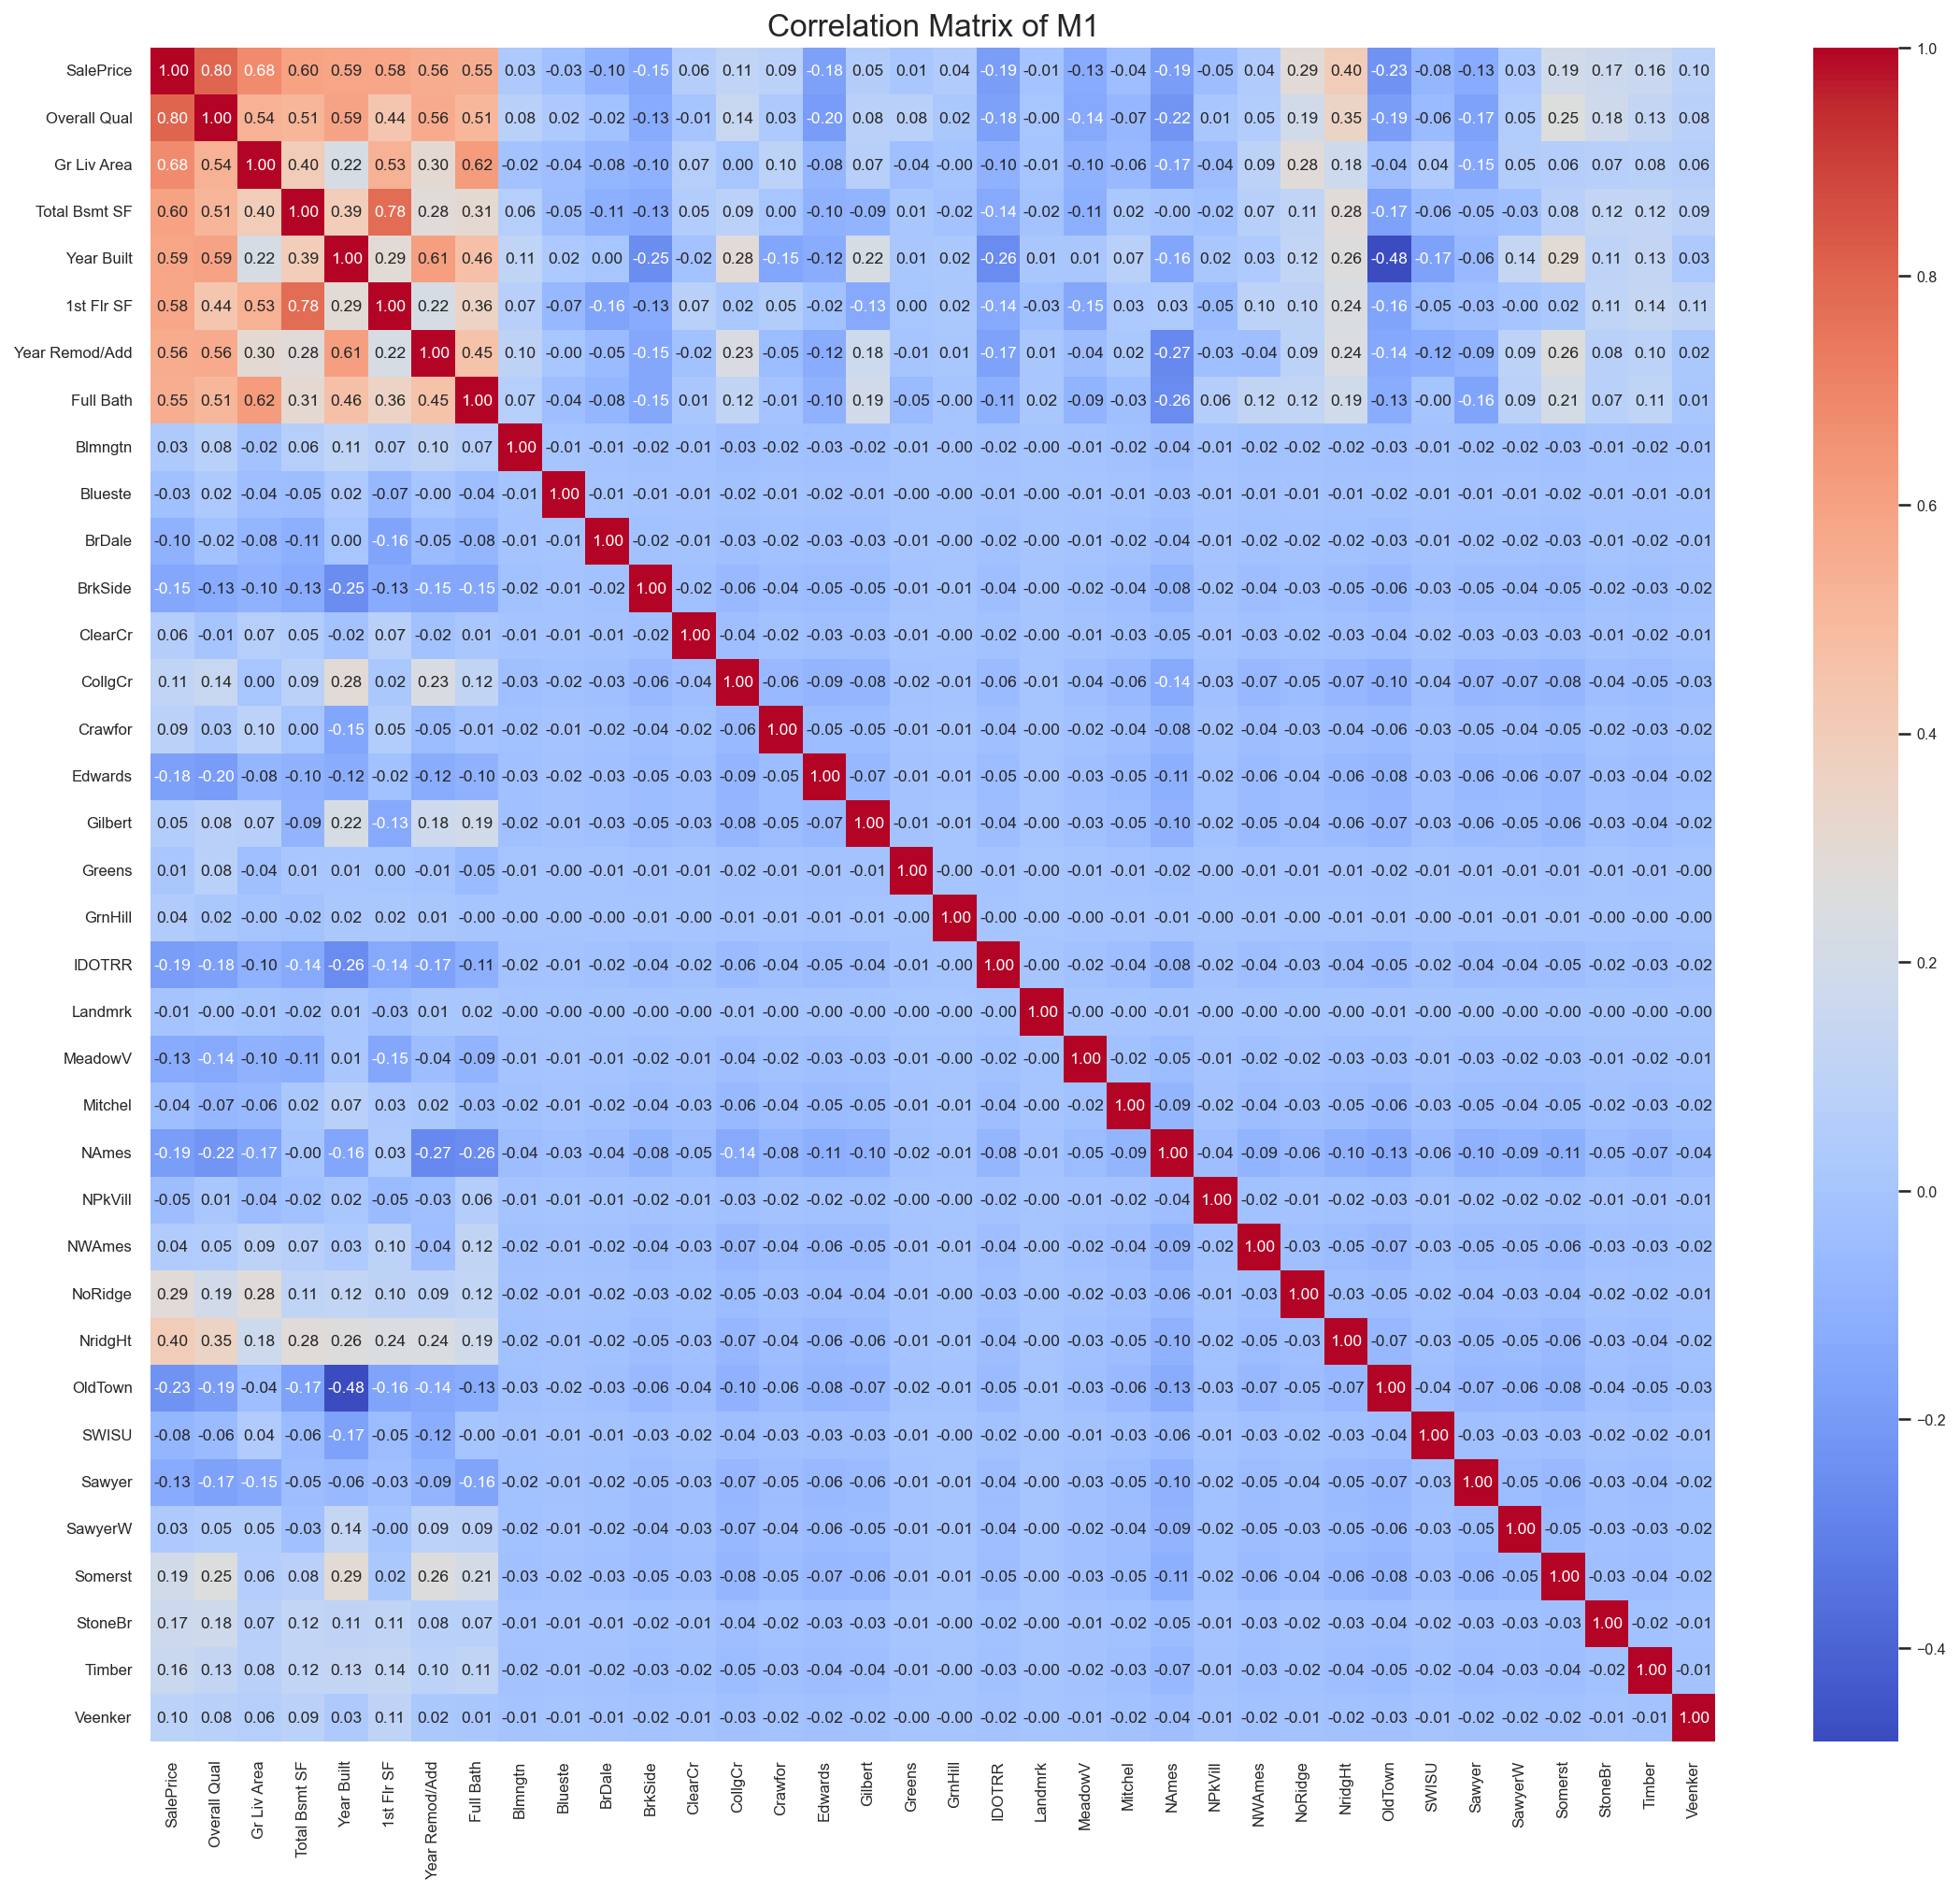

In [29]:
fig, ax = plt.subplots(figsize=(18, 16), dpi = 150)

sns.set(font_scale=0.7)
sns.heatmap(m1.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of M1", fontsize=16)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)
plt.show()

In [30]:
m1_tvt = m1.to_numpy()

X1 = m1_tvt[:, 1:]
y1 = m1_tvt[:, 0]

# ---------------------
# Train-vali-test split
# ---------------------
X1_tv, X1_test, y1_tv, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 1)
X1_train, X1_vali, y1_train, y1_vali = train_test_split(X1_tv, y1_tv, test_size = 1/3, random_state = 1)

# -----------------------------------
# Build and fit your regression model
# -----------------------------------
linear_reg = LinearRegression()
linear_reg.fit(X1_train, y1_train)

# Print model parameters (Do not modify)
# ----------------------
print('beta 0: {:.2f}'.format(linear_reg.intercept_))
for i in range(35):
    print('beta {}: {:.2f}'.format(i+1, linear_reg.coef_[i]))

beta 0: -1282498.41
beta 1: 16685.60
beta 2: 33.77
beta 3: 7.54
beta 4: 325.80
beta 5: 15.67
beta 6: 323.80
beta 7: -594.05
beta 8: -21299.66
beta 9: -18864.16
beta 10: -41150.43
beta 11: -6487.41
beta 12: 27382.51
beta 13: -4296.95
beta 14: 21749.22
beta 15: -14978.75
beta 16: -6997.03
beta 17: -12719.26
beta 18: 77784.10
beta 19: -18127.04
beta 20: -33600.38
beta 21: -26977.21
beta 22: -13437.40
beta 23: -7244.77
beta 24: -29282.32
beta 25: -6859.69
beta 26: 54547.45
beta 27: 43278.91
beta 28: -14109.88
beta 29: -5986.68
beta 30: -10594.27
beta 31: -13585.55
beta 32: 2437.80
beta 33: 33998.90
beta 34: 18068.53
beta 35: 27351.42


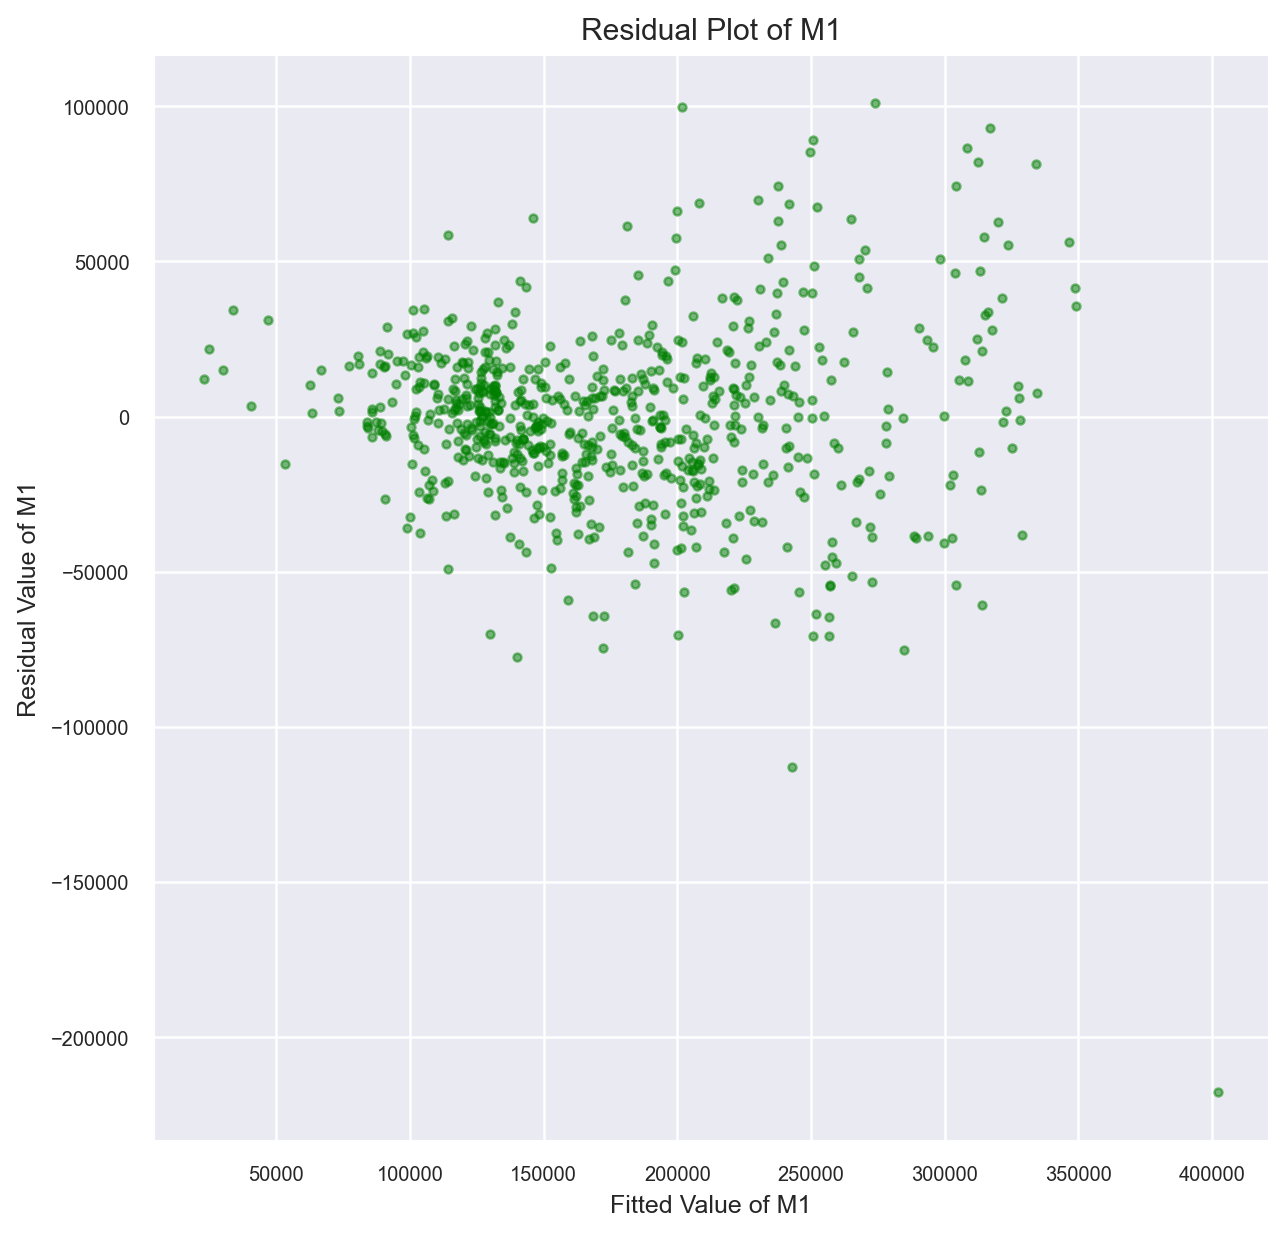

In [31]:
# Predict on the test data
# ------------------------
# Your code here
y1_pred = linear_reg.predict(X1_vali)
residual1 = y1_vali - y1_pred

plt.figure(figsize = (8,8),dpi=180)
plt.scatter(y1_pred, residual1, marker = 'o', s = 10, color = 'green', alpha = 0.5)
plt.xlabel('Fitted Value of M1', fontsize = 10)
plt.ylabel('Residual Value of M1', fontsize = 10)
plt.title('Residual Plot of M1', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.savefig('plot')

In [32]:
# Calculate the MSE
# -----------------
mse1_vali = mse(y1_vali, y1_pred)
print("Train mse M1: {:.4f}".format(mse1_vali))

Train mse M1: 781023866.8397


In [33]:
X1_vali.shape

(721, 35)

In [35]:
linear_reg = LinearRegression()
linear_reg.fit(X1_tv, y1_tv)

# ------------------------
# Predict on the test data
# ------------------------
pred_test = linear_reg.predict(X1_test)

# Print model parameters (Do not modify)
# ----------------------
print('beta 0: {:.2f}'.format(linear_reg.intercept_))
for i in range(35):
    print('beta {}: {:.2f}'.format(i+1, linear_reg.coef_[i]))
    
# -----------------
# Calculate the MSE
# -----------------
mse_test = mse(pred_test, y1_test)

print("Test MSE: {:.4f}".format(mse_test))

beta 0: -1269839.87
beta 1: 15577.31
beta 2: 38.74
beta 3: 11.60
beta 4: 303.22
beta 5: 11.42
beta 6: 340.98
beta 7: -2054.17
beta 8: -16630.76
beta 9: -25918.62
beta 10: -39223.01
beta 11: -7768.93
beta 12: 24547.36
beta 13: -4461.51
beta 14: 23734.58
beta 15: -17953.83
beta 16: -7703.41
beta 17: -6183.76
beta 18: 81787.09
beta 19: -16858.69
beta 20: -32370.28
beta 21: -27987.05
beta 22: -8296.72
beta 23: -7765.88
beta 24: -26481.50
beta 25: -5430.41
beta 26: 50365.72
beta 27: 44086.87
beta 28: -17240.63
beta 29: -15406.77
beta 30: -9414.92
beta 31: -11971.30
beta 32: 5469.59
beta 33: 24545.21
beta 34: 18928.09
beta 35: 31603.49
Test MSE: 805789239.2267


### Model 2

In [36]:
m2 = data[["SalePrice","Overall Qual", "Gr Liv Area","Total Bsmt SF", "Year Built", "1st Flr SF", "Year Remod/Add", "Full Bath"]]

In [37]:
m2["Full Bath"].value_counts()

2    1504
1    1315
3      50
0      12
4       4
Name: Full Bath, dtype: int64

In [38]:
m2["Full Bath x Gr Liv Area"] = m2["Gr Liv Area"] * m2["Full Bath"]
m2

/var/folders/1y/v5h47dts3fn684lz10fz335w0000gn/T/ipykernel_3979/3541772244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2["Full Bath x Gr Liv Area"] = m2["Gr Liv Area"] * m2["Full Bath"]


,SalePrice,Overall Qual,Gr Liv Area,Total Bsmt SF,Year Built,1st Flr SF,Year Remod/Add,Full Bath,Full Bath x Gr Liv Area
0,215000,6,1656,1080.0,1960,1656,1960,1,1656
1,105000,5,896,882.0,1961,896,1961,1,896
2,172000,6,1329,1329.0,1958,1329,1958,1,1329
3,244000,7,2110,2110.0,1968,2110,1968,2,4220
4,189900,5,1629,928.0,1997,928,1998,2,3258
...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,1003.0,1984,1003,1984,1,1003
2926,131000,5,902,864.0,1983,902,1983,1,902
2927,132000,5,970,912.0,1992,970,1992,1,970
2928,170000,5,1389,1389.0,1974,1389,1975,1,1389


In [39]:
m2.columns.get_loc("Full Bath x Gr Liv Area")

8

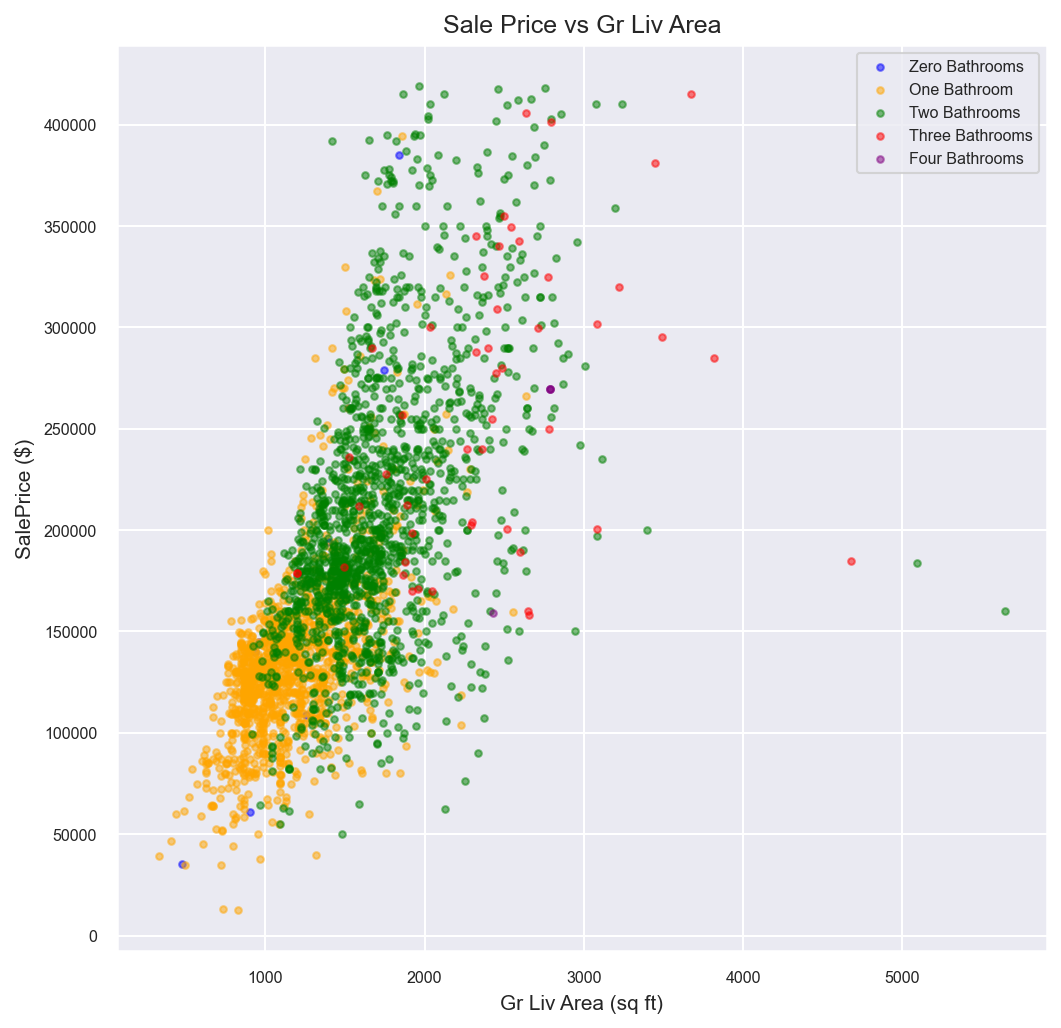

In [40]:
plt.figure(figsize = (8,8),dpi=150)

#0

x1 = m2[m2['Full Bath'] == 0].iloc[:,2]
y1 = m2[m2['Full Bath'] == 0].iloc[:,0]

#1
x2 = m2[m2['Full Bath'] == 1].iloc[:,2]
y2 = m2[m2['Full Bath'] == 1].iloc[:,0]

#2
x3 = m2[m2['Full Bath'] == 2].iloc[:,2]
y3 = m2[m2['Full Bath'] == 2].iloc[:,0]

#3
x4 = m2[m2['Full Bath'] == 3].iloc[:,2]
y4 = m2[m2['Full Bath'] == 3].iloc[:,0]

#4
x5 = m2[m2['Full Bath'] == 4].iloc[:,2]
y5 = m2[m2['Full Bath'] == 4].iloc[:,0]

plt.scatter(x1, y1, label = 'Zero Bathrooms', marker = 'o', s = 10, color = 'blue', alpha = 0.5)
plt.scatter(x2, y2, label = 'One Bathroom', marker = 'o', s = 10, color = 'orange', alpha = 0.5)
plt.scatter(x3, y3, label = 'Two Bathrooms', marker = 'o', s = 10, color = 'green', alpha = 0.5)
plt.scatter(x4, y4, label = 'Three Bathrooms', marker = 'o', s = 10, color = 'red', alpha = 0.5)
plt.scatter(x5, y5, label = 'Four Bathrooms', marker = 'o', s = 10, color = 'purple', alpha = 0.5)

plt.xlabel('Gr Liv Area (sq ft)', fontsize = 10)
plt.ylabel('SalePrice ($)', fontsize = 10)
plt.title('Sale Price vs Gr Liv Area', fontsize = 12)
plt.legend()

plt.savefig('plot')

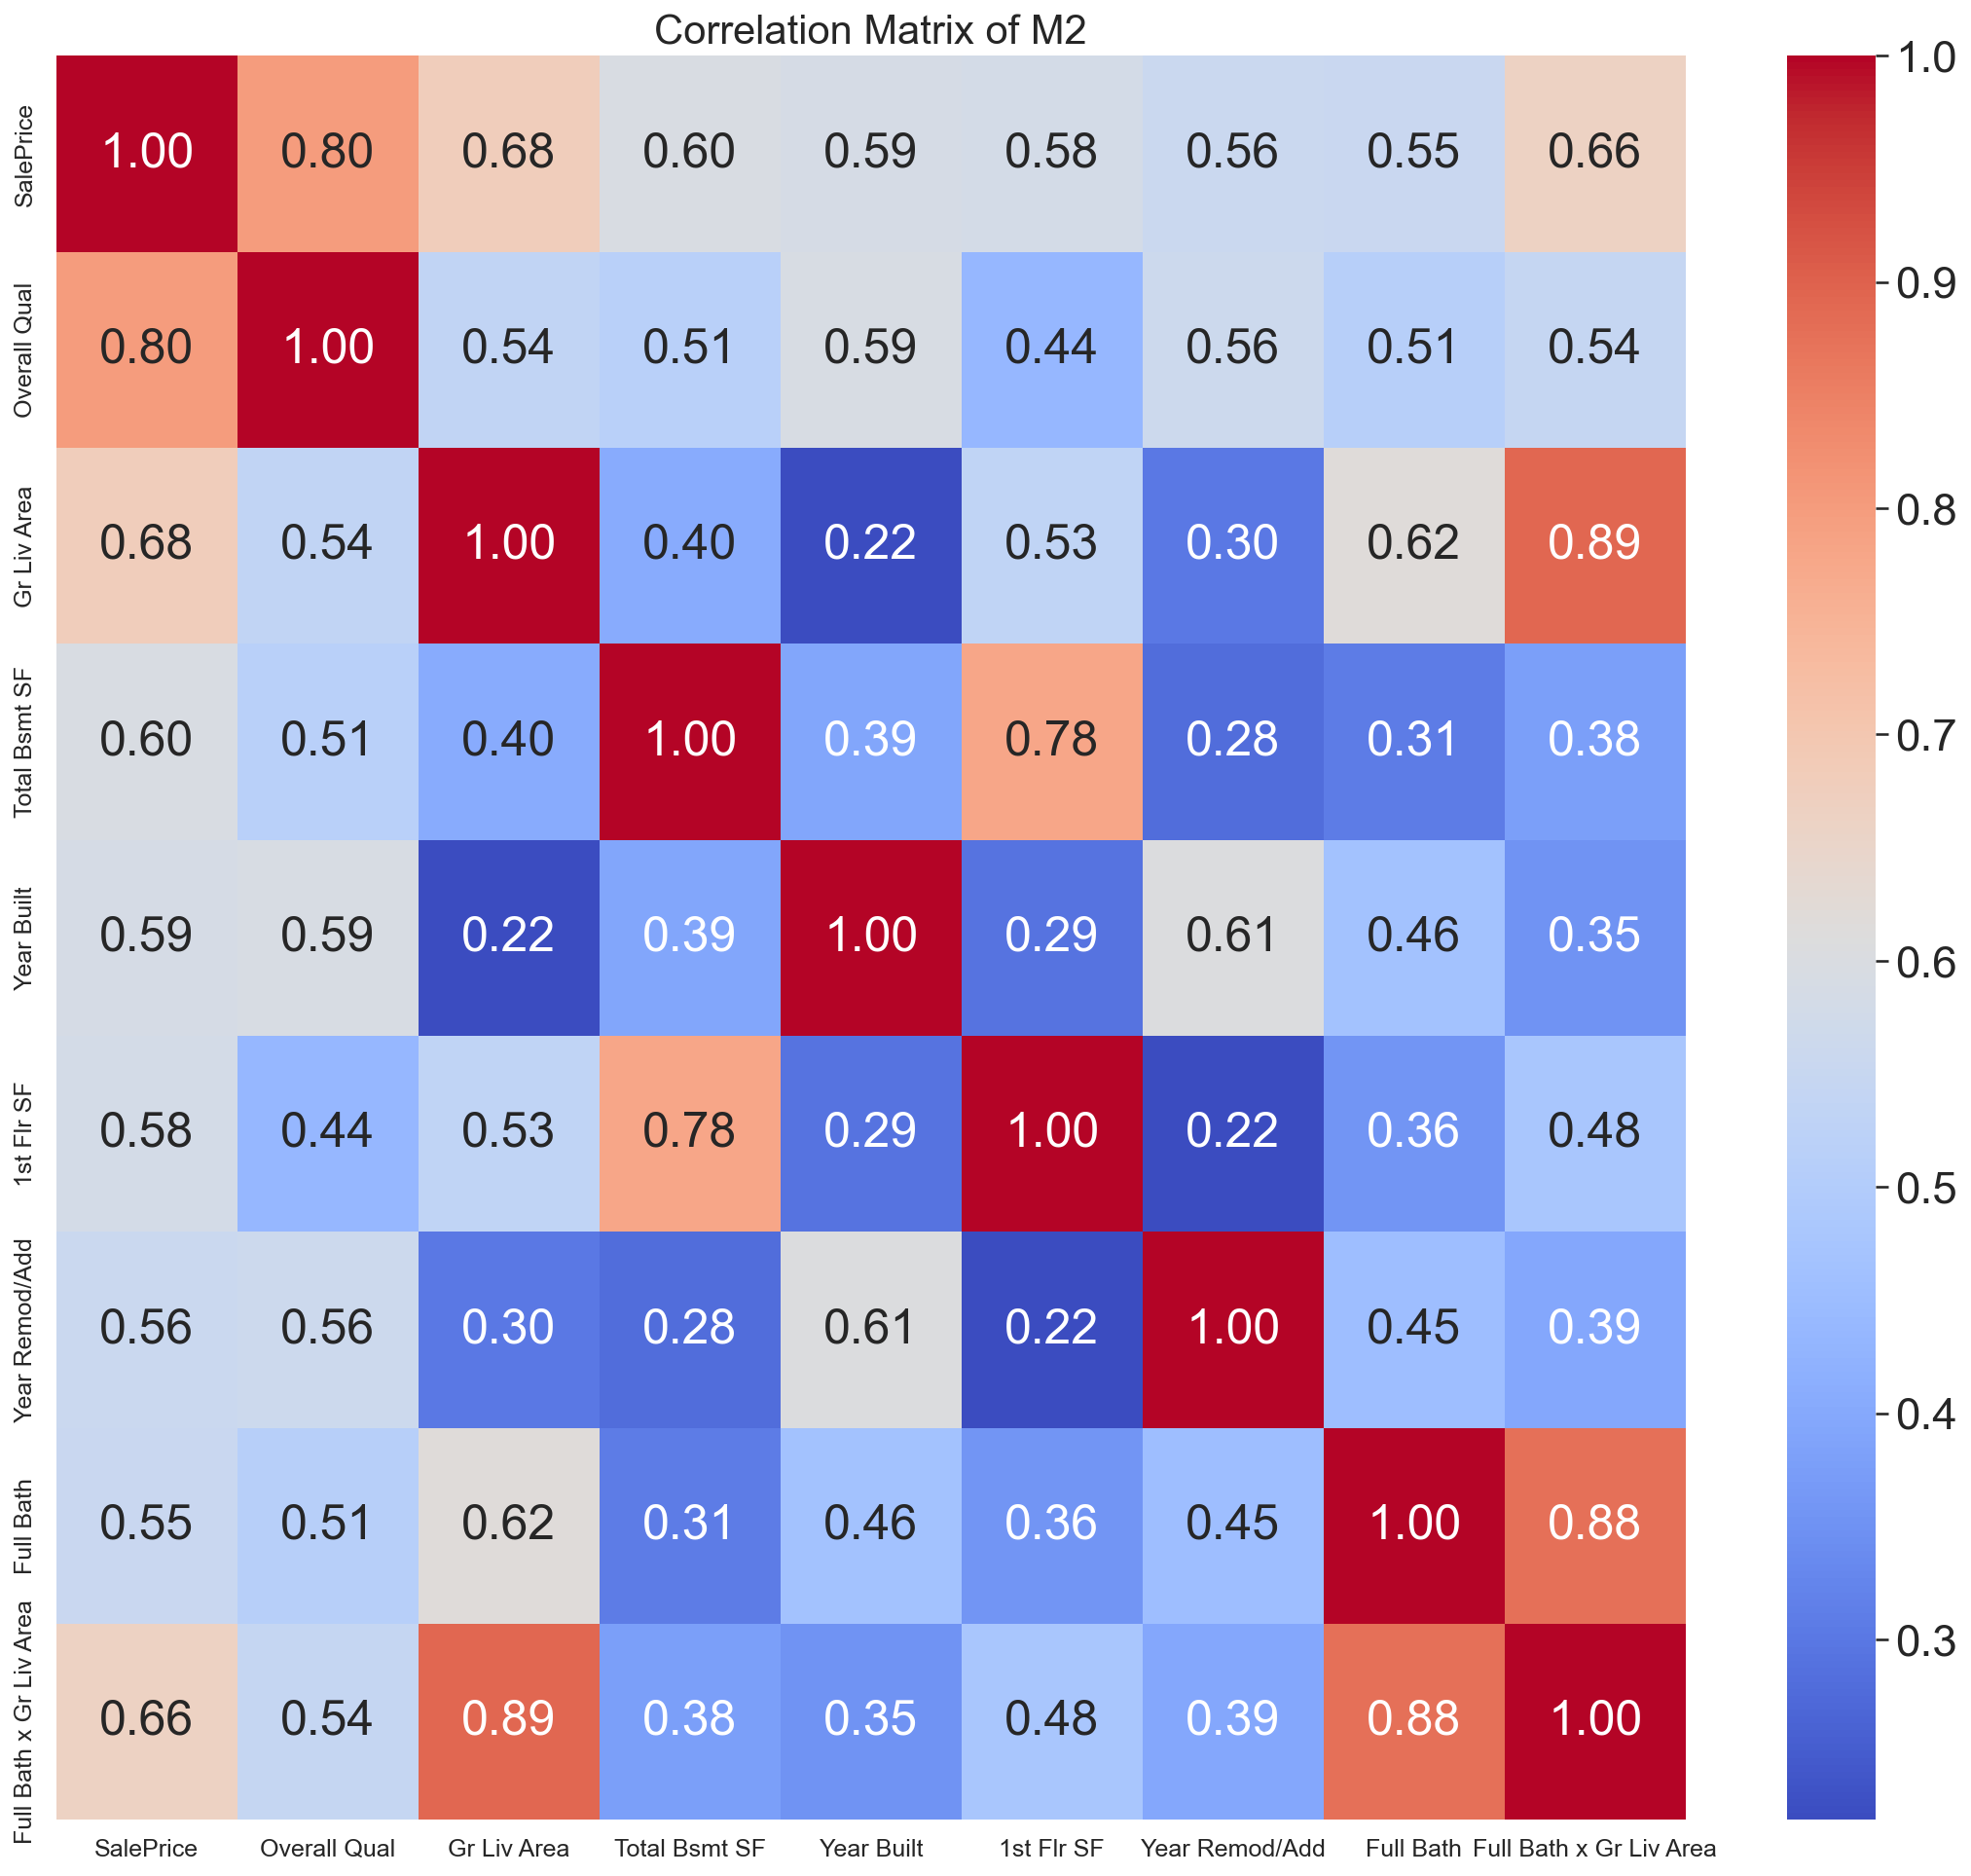

In [41]:
fig, ax = plt.subplots(figsize=(18, 16), dpi = 150)

sns.set(font_scale=2)
sns.heatmap(m2.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of M2", fontsize=20)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
plt.show()

In [42]:
m2_tvt = m2.to_numpy()

X2 = m2_tvt[:, 1:]
y2 = m2_tvt[:, 0]

# ---------------------
# Train-vali-test split
# ---------------------
X2_tv, X2_test, y2_tv, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 1)
X2_train, X2_vali, y2_train, y2_vali = train_test_split(X2_tv, y2_tv, test_size = 1/3, random_state = 1)

# -----------------------------------
# Build and fit your regression model
# -----------------------------------
linear_reg = LinearRegression()
linear_reg.fit(X2_train, y2_train)

# Print model parameters (Do not modify)
# ----------------------
print('beta 0: {:.2f}'.format(linear_reg.intercept_))
for i in range(8):
    print('beta {}: {:.2f}'.format(i+1, linear_reg.coef_[i]))

beta 0: -1419533.82
beta 1: 21846.12
beta 2: 27.07
beta 3: 9.93
beta 4: 364.79
beta 5: 17.56
beta 6: 340.68
beta 7: -14481.40
beta 8: 8.03


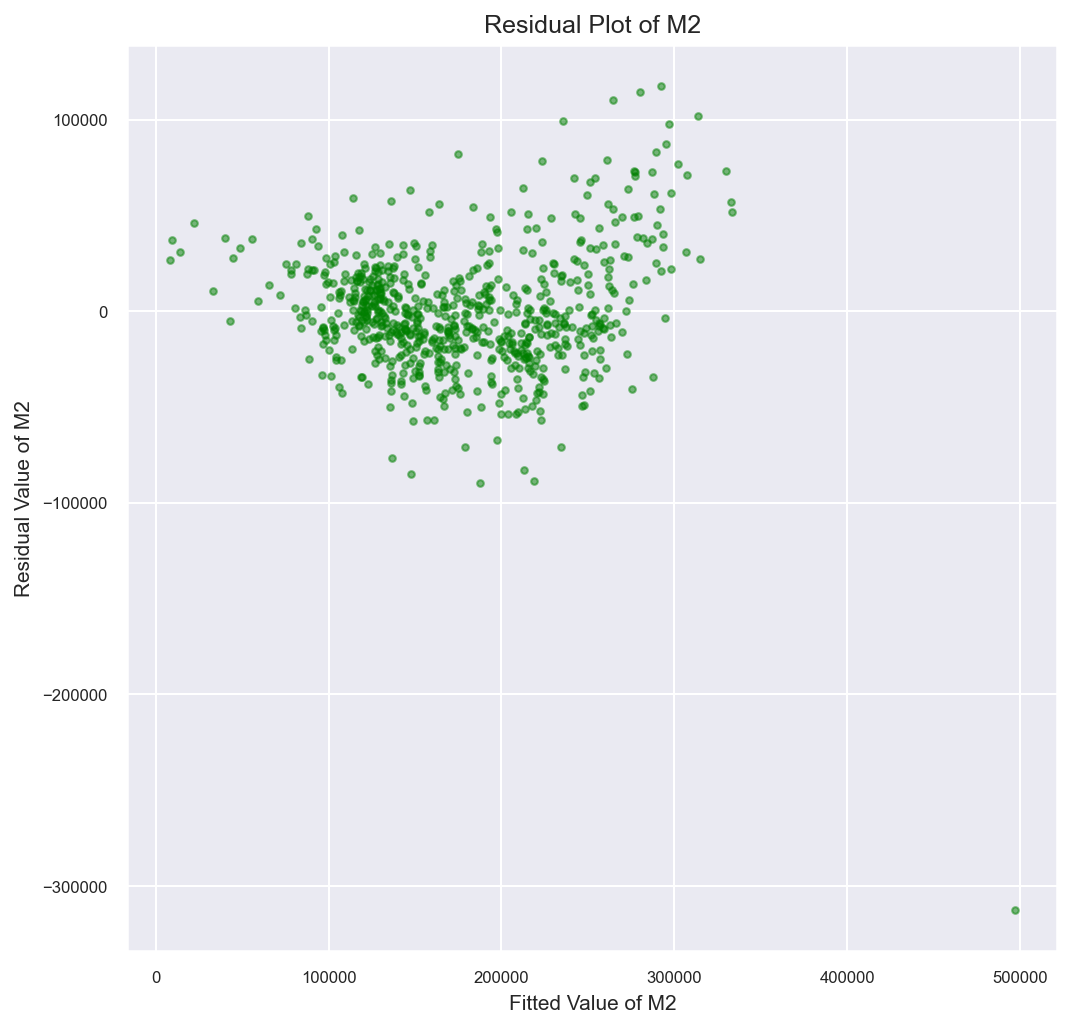

In [43]:
# Predict on the test data
# ------------------------
# Your code here
y2_pred = linear_reg.predict(X2_vali)
residual2 = y2_vali - y2_pred

plt.figure(figsize = (8,8),dpi=150)
plt.scatter(y2_pred, residual2, marker = 'o', s = 10, color = 'green', alpha = 0.5)
plt.xlabel('Fitted Value of M2', fontsize = 10)
plt.ylabel('Residual Value of M2', fontsize = 10)
plt.title('Residual Plot of M2', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.savefig('plot')

In [44]:
# Calculate the MSE
# -----------------
mse2_vali = mse(y2_vali, y2_pred)
print("Train mse M2: {:.4f}".format(mse2_vali))

Train mse M2: 986041015.9912


### Model 3

In [45]:
m3 = data[["SalePrice","Overall Qual", "Gr Liv Area","Total Bsmt SF", "Year Built", "1st Flr SF", "Year Remod/Add", "Full Bath"]]

In [46]:
m3["Gr Liv Area^2"] = m3["Gr Liv Area"] ** 2
m3["Gr Liv Area^3"] = m3["Gr Liv Area"] ** 3
m3["Gr Liv Area^4"] = m3["Gr Liv Area"] ** 4
m3["Gr Liv Area^5"] = m3["Gr Liv Area"] ** 5
m3["Gr Liv Area^6"] = m3["Gr Liv Area"] ** 6
m3["Gr Liv Area^7"] = m3["Gr Liv Area"] ** 7
m3["Gr Liv Area^8"] = m3["Gr Liv Area"] ** 8
m3["Gr Liv Area^9"] = m3["Gr Liv Area"] ** 9
m3["Gr Liv Area^10"] = m3["Gr Liv Area"] ** 10
m3["Gr Liv Area^11"] = m3["Gr Liv Area"] ** 11
m3["Gr Liv Area^12"] = m3["Gr Liv Area"] ** 12
m3["Gr Liv Area^13"] = m3["Gr Liv Area"] ** 13
m3["Gr Liv Area^14"] = m3["Gr Liv Area"] ** 14
m3["Gr Liv Area^15"] = m3["Gr Liv Area"] ** 15
m3["Gr Liv Area^16"] = m3["Gr Liv Area"] ** 16
m3["Gr Liv Area^17"] = m3["Gr Liv Area"] ** 17
m3["Gr Liv Area^18"] = m3["Gr Liv Area"] ** 18
m3["Gr Liv Area^19"] = m3["Gr Liv Area"] ** 19
m3["Gr Liv Area^20"] = m3["Gr Liv Area"] ** 20

/var/folders/1y/v5h47dts3fn684lz10fz335w0000gn/T/ipykernel_3979/1977740084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3["Gr Liv Area^2"] = m3["Gr Liv Area"] ** 2
/var/folders/1y/v5h47dts3fn684lz10fz335w0000gn/T/ipykernel_3979/1977740084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3["Gr Liv Area^3"] = m3["Gr Liv Area"] ** 3
/var/folders/1y/v5h47dts3fn684lz10fz335w0000gn/T/ipykernel_3979/1977740084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [47]:
m3.columns.get_loc("Gr Liv Area")

2

In [48]:
move = m3.pop("Gr Liv Area")

# insert column with insert(location, column_name, column_value)

m3.insert(7, "Gr Liv Area", move)

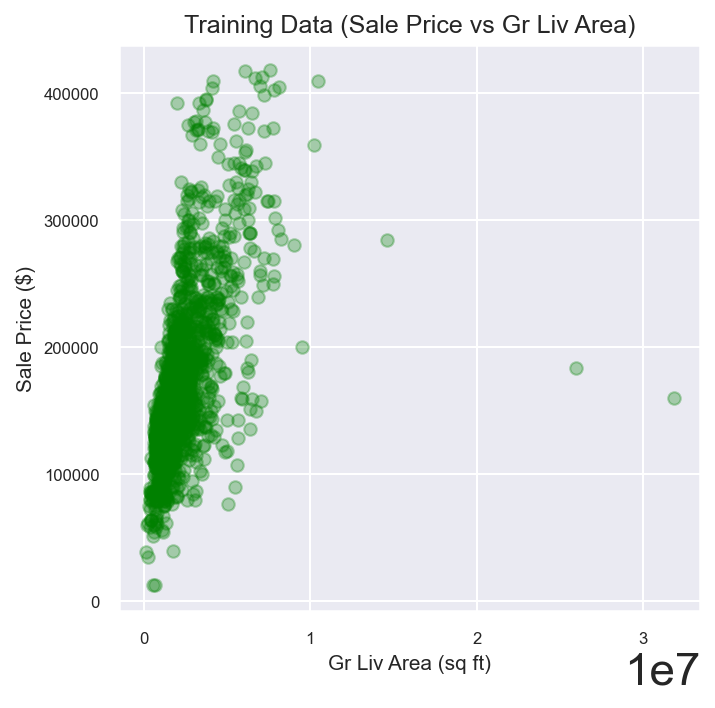

In [49]:
m3_tvt = m3.to_numpy()
from sklearn.model_selection import train_test_split

# --------------
# Load your data
# --------------
X3 = m3_tvt[:, 1:] #all values but the 0th column (y)
y3 = m3_tvt[:, 0] #pull out the first column

# ---------------------
# Train-vali-test split
# ---------------------
X3_tv, X3_test, y3_tv, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 1)
X3_train, X3_vali, y3_train, y3_vali = train_test_split(X3_tv, y3_tv, test_size = 1/3, random_state = 1) #0.25/0.75

# -----------------------
# Plot your training data
# -----------------------

fig, ax = plt.subplots(figsize=(5, 5), dpi = 150)
plt.scatter(X3_train[:, 7], y3_train, color = "green", alpha = 0.3)# complete this

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Gr Liv Area (sq ft)', fontsize = 10)
plt.ylabel('Sale Price ($)', fontsize = 10)
plt.title('Training Data (Sale Price vs Gr Liv Area)', fontsize = 12)
plt.savefig('plot.png')

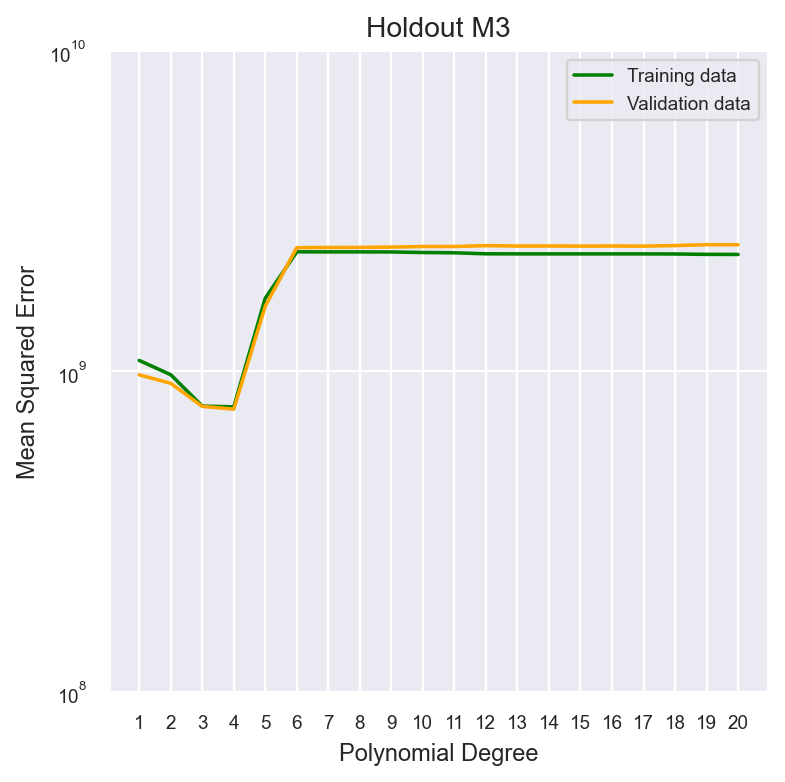

In [50]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 

fig, ax = plt.subplots(figsize=(5, 5), dpi = 170)

mse_train3 = []
mse_vali3 = []

max_deg = 20
degrees = range(1, max_deg+1)

for deg in degrees:
    # -----------------------------------
    # Build and fit your regression model
    # -----------------------------------
    linear_reg = LinearRegression()
    linear_reg.fit(X3_train[:,:deg+6], y3_train)

    # ----------------------------------
    # Predict with your regression model
    # ----------------------------------
    pred_train3 = linear_reg.predict(X3_train[:,:deg+6])
    pred_vali3 = linear_reg.predict(X3_vali[:,:deg+6])

    # -----------------
    # Calculate the MSE
    # -----------------
    mse_train3.append(mse(y3_train, pred_train3))
    mse_vali3.append(mse(y3_vali, pred_vali3))

# ------------------------
# Plot the holdout results (Do not modify)
# ------------------------

plt.plot(degrees, mse_train3, color = 'green', label = 'Training data')
plt.plot(degrees, mse_vali3, color = 'orange', label = 'Validation data')
plt.xlabel('Polynomial Degree', fontsize = 10)
plt.ylabel('Mean Squared Error', fontsize = 10)
plt.title('Holdout M3', fontsize = 12)
plt.xticks(degrees, fontsize = 8)
plt.yticks(fontsize = 8)
plt.yscale('log')
plt.ylim([10e7, 10e9])
plt.legend(prop={"size":8})
plt.savefig('holdoutm3.png')

In [51]:
# -----------------------------------
# Build and fit your regression model
# -----------------------------------
linear_reg = LinearRegression()
linear_reg.fit(X3_train, y3_train)

# Print model parameters (Do not modify)
# ----------------------
print('beta 0: {:.2f}'.format(linear_reg.intercept_))
for i in range(10):
    print('beta {}: {:.12f}'.format(i+1, linear_reg.coef_[i]))

beta 0: 61154.00
beta 1: 0.000149418329
beta 2: 0.000347593871
beta 3: -0.000260514659
beta 4: 0.000445035966
beta 5: -0.000050219697
beta 6: 0.000325738171
beta 7: 0.000037475066
beta 8: 0.089750907209
beta 9: -0.000029463508
beta 10: 0.000000003377


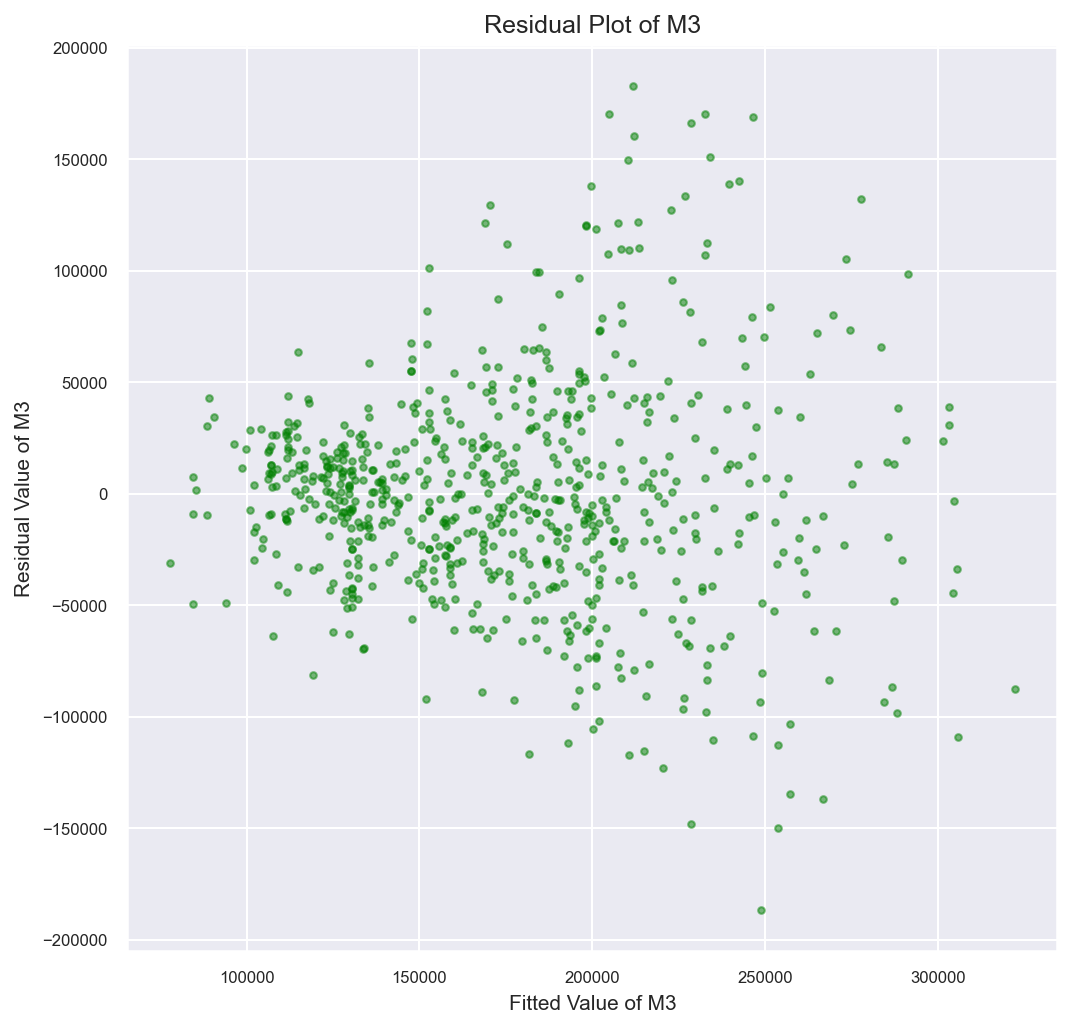

In [52]:
# Predict on the test data
# ------------------------
# Your code here
y3_pred = linear_reg.predict(X3_vali)
residual3 = y3_vali - y3_pred

plt.figure(figsize = (8,8),dpi=150)
plt.scatter(y3_pred, residual3, marker = 'o', s = 10, color = 'green', alpha = 0.5)
plt.xlabel('Fitted Value of M3', fontsize = 10)
plt.ylabel('Residual Value of M3', fontsize = 10)
plt.title('Residual Plot of M3', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.savefig('plot')

In [53]:
# Calculate the MSE
# -----------------
mse3_vali = mse(y3_vali, y3_pred)
print("Train mse M3: {:.4f}".format(mse3_vali))

Train mse M3: 2478824675.1275


### Benchmark Models

#### BM 1

In [54]:
bm1 = data

In [55]:
bm1.columns.get_loc("SalePrice")

78

In [56]:
bm1

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,NA,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,GdPrv,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,IR1,Low,AllPub,...,0,0,0,MnPrv,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,MnPrv,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,NA,0,4,2006,WD,Normal,170000


In [57]:
bm1_tvt = bm1.to_numpy()

Xbm1 = bm1_tvt[:, 1:77]
ybm1 = bm1_tvt[:, 78]

# ---------------------
# Train-vali-test split
# ---------------------
Xbm1_tv, Xbm1_test, ybm1_tv, ybm1_test = train_test_split(Xbm1, ybm1, test_size = 0.25, random_state = 1)

In [58]:
ybm1_tv.shape

(2163,)

In [59]:
ybm1_tv

array([215000, 218689, 153000, ..., 245000, 127000, 195000], dtype=object)

In [60]:
y_pred_bm1tv = np.full((722, ), np.mean(ybm1_tv))

In [79]:
ybm1_tv.mean()

175703.22561257513

In [61]:
y_pred_bm1tv.shape

(722,)

In [62]:
ybm1_test.shape

(722,)

In [63]:
# Calculate the MSE
# -----------------
mse_bm1 = mse(ybm1_test, y_pred_bm1tv)
print("Test mse BM1: {:.4f}".format(mse_bm1))

Test mse BM1: 4979906804.4713


In [64]:
y_pred_bm1tv

array([175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 175703.22561258, 175703.22561258, 175703.22561258,
       175703.22561258, 1

#### BM2

In [65]:
bm2 = data

In [66]:
bm2["Neighborhood"].value_counts()

NAmes      443
CollgCr    265
OldTown    238
Edwards    194
Somerst    180
Gilbert    165
Sawyer     151
NridgHt    144
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      71
NoRidge     65
SWISU       48
ClearCr     44
StoneBr     40
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [67]:
bm2.groupby("Neighborhood")["SalePrice"].mean()

Neighborhood
Blmngtn    196661.678571
Blueste    143590.000000
BrDale     105608.333333
BrkSide    124756.250000
ClearCr    208662.090909
CollgCr    199930.743396
Crawfor    207550.834951
Edwards    130843.381443
Gilbert    190646.575758
Greens     193531.250000
GrnHill    280000.000000
IDOTRR     103752.903226
Landmrk    137000.000000
MeadowV     95756.486486
Mitchel    162226.631579
NAmes      145097.349887
NPkVill    140710.869565
NWAmes     188406.908397
NoRidge    305333.200000
NridgHt    295608.965278
OldTown    122517.067227
SWISU      135071.937500
Sawyer     136751.152318
SawyerW    184070.184000
Somerst    227309.627778
StoneBr    275110.100000
Timber     244086.859155
Veenker    248314.583333
Name: SalePrice, dtype: float64

In [68]:
def categorise(row):  
    if row['Neighborhood'] == "NoRidge":
        return 305333.200000
    elif row['Neighborhood'] == "NridgHt":
        return 295608.965278
    elif row['Neighborhood'] == "GrnHill":
        return 280000.000000
    elif row['Neighborhood'] == "StoneBr":
        return 275110.100000
    elif row['Neighborhood'] == "Veenker":
        return 248314.583333
    elif row['Neighborhood'] == "Timber":
        return 244086.859155
    elif row['Neighborhood'] == "Somerst":
        return 227309.627778
    elif row['Neighborhood'] == "ClearCr":
        return 208662.090909
    elif row['Neighborhood'] == "Crawfor":
        return 207550.834951
    elif row['Neighborhood'] == "CollgCr":
        return 199930.743396
    elif row['Neighborhood'] == "Blmngtn":
        return 196661.678571
    elif row['Neighborhood'] == "Greens":
        return 275110.100000
    elif row['Neighborhood'] == "Gilbert":
        return 190646.575758
    elif row['Neighborhood'] == "NWAmes":
        return 188406.908397
    elif row['Neighborhood'] == "SawyerW":
        return 184070.184000
    elif row['Neighborhood'] == "Mitchel":
        return 162226.631579
    elif row['Neighborhood'] == "NAmes":
        return 145097.349887
    elif row['Neighborhood'] == "Blueste":
        return 143590.000000
    elif row['Neighborhood'] == "NPkVill":
        return 140710.869565
    elif row['Neighborhood'] == "Landmrk":
        return 137000.000000
    elif row['Neighborhood'] == "Sawyer":
        return 136751.152318
    elif row['Neighborhood'] == "SWISU":
        return 135071.937500
    elif row['Neighborhood'] == "Edwards":
        return 130843.381443
    elif row['Neighborhood'] == "BrkSide":
        return 124756.250000
    elif row['Neighborhood'] == "OldTown":
        return 122517.067227
    elif row['Neighborhood'] == "BrDale":
        return 105608.333333
    elif row['Neighborhood'] == "IDOTRR":
        return 103752.903226
    return '95756.486486'

In [69]:
bm2['y_pred_bm2tv'] = bm2.apply(lambda row: categorise(row), axis=1)

In [70]:
bm2.columns.get_loc("y_pred_bm2tv")

79

In [71]:
bm2_tvt = bm2.to_numpy()

Xbm2 = bm2_tvt[:, 1:77]
ybm2 = bm2_tvt[:, 78]

# ---------------------
# Train-vali-test split
# ---------------------
Xbm2_tv, Xbm2_test, ybm2_tv, ybm2_test = train_test_split(Xbm2, ybm2, test_size = 0.25, random_state = 1)

In [72]:
Xbm2x = bm2_tvt[:, 1:77]
ybm2x = bm2_tvt[:, 79]

# ---------------------
# Train-vali-test split
# ---------------------
Xbm2x_tv, Xbm2x_test, ybm2x_tv, ybm2x_test = train_test_split(Xbm2x, ybm2x, test_size = 0.25, random_state = 1)

In [73]:
ybm2_test.shape

(722,)

In [74]:
ybm2x

array([145097.349887, 145097.349887, 145097.349887, ..., 162226.631579,
       162226.631579, 162226.631579], dtype=object)

In [75]:
ybm2_tv

array([215000, 218689, 153000, ..., 245000, 127000, 195000], dtype=object)

In [76]:
ybm2x_test.shape

(722,)

In [77]:
# Calculate the MSE
# -----------------
mse_bm2 = mse(ybm2_test, ybm2x_test)
print("Test mse BM2: {:.4f}".format(mse_bm2))

Test mse BM2: 2252017481.6560
